In [28]:
import matplotlib
from matplotlib import pyplot
import numpy as np

import sys
sys.path.append("..")
from hiora_cartpole import features
from hiora_cartpole import fourier_fa
from hiora_cartpole import easytile_fa
from hiora_cartpole import driver

import gym

In [93]:
temp_env = gym.make('CartPole-v0')
observation_space = temp_env.observation_space
del temp_env

orig_step           = gym.envs.classic_control.cartpole.CartPoleEnv._step
clipped_high        = observation_space.high
clipped_high[[1,3]] = 10
clipped_low         = -clipped_high
state_ranges = np.array([clipped_low, clipped_high])

def clipped_step(self, action):
    state, reward, done, info = orig_step(self, action)
    return np.clip(state, clipped_low, clipped_high), reward, done, info

gym.envs.classic_control.cartpole.CartPoleEnv._step = clipped_step

env = gym.make('CartPole-v0')

[2016-09-21 16:30:15,795] Making new env: CartPole-v0
[2016-09-21 16:30:15,801] Making new env: CartPole-v0


In [141]:
easyt_n_weights, easyt_feature_vec = easytile_fa.make_feature_vec(state_ranges, 2, [7, 9, 9, 9], 8)

#fv = feature_vec(cartpole.observation_space.sample(), cartpole.action_space.sample())

from hiora_cartpole import linfa
eexperience = linfa.init(lmbda=0.9,
                        init_alpha=0.05,
                        epsi=0.01,
                        feature_vec=easyt_feature_vec,
                        n_weights=easyt_n_weights,
                        act_space=env.action_space,
                        theta=None,
                        is_use_alpha_bounds=True)

<IPython.core.display.Javascript object>


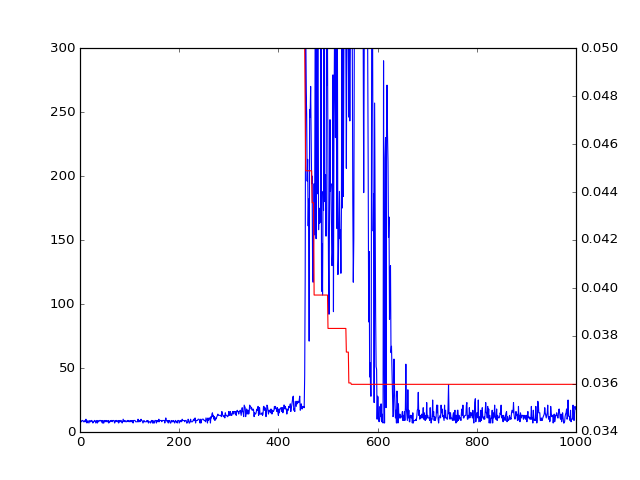

In [142]:
eexperience, steps_per_episode, alpha_per_episode \
    = driver.train(env, linfa, eexperience, n_episodes=1000, max_steps=300, is_render=False)
# Credits: http://matplotlib.org/examples/api/two_scales.html
fig, ax1 = pyplot.subplots()
ax1.plot(steps_per_episode, color='b')
ax2 = ax1.twinx()
ax2.plot(alpha_per_episode, color='r')
pyplot.show()

In [135]:
steps_per_episode = driver.exec_greedy(env, eexperience, n_episodes=15, max_steps=2000, is_render=True)

<IPython.core.display.Javascript object>


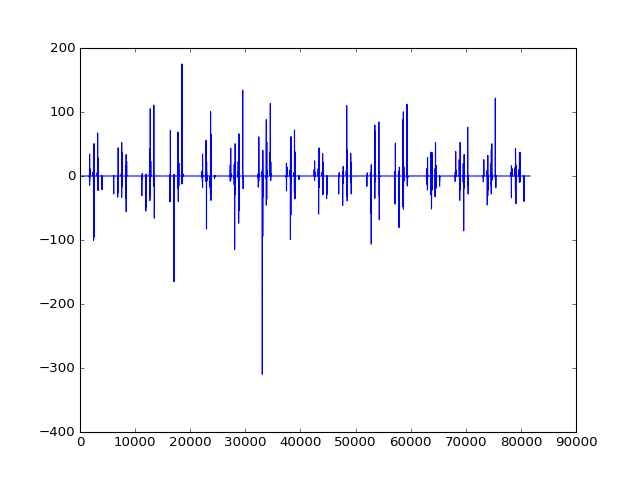

[1660,
 1669,
 1670,
 1678,
 1722,
 1723,
 1731,
 1732,
 1740,
 1741,
 1749,
 1750,
 1759,
 1803,
 1812,
 1821,
 1822,
 1830,
 2371,
 2380,
 2451,
 2452,
 2460,
 2461,
 2469,
 2470,
 2479,
 2480,
 2488,
 2489,
 2532,
 2533,
 2541,
 2542,
 2550,
 2551,
 2559,
 2560,
 2569,
 3109,
 3180,
 3181,
 3189,
 3190,
 3198,
 3199,
 3208,
 3217,
 3261,
 3262,
 3270,
 3271,
 3279,
 3280,
 3288,
 3289,
 3298,
 3910,
 3919,
 3990,
 3991,
 3999,
 4000,
 4008,
 4009,
 4017,
 4018,
 6097,
 6106,
 6115,
 6116,
 6124,
 6125,
 6773,
 6825,
 6826,
 6827,
 6835,
 6836,
 6844,
 6845,
 6853,
 6854,
 6862,
 6863,
 6906,
 6907,
 6915,
 6916,
 6924,
 6925,
 6934,
 7484,
 7555,
 7556,
 7564,
 7565,
 7573,
 7574,
 7582,
 7583,
 7591,
 7592,
 7635,
 7636,
 7644,
 7645,
 7646,
 7653,
 7654,
 7663,
 7664,
 7672,
 7673,
 8284,
 8285,
 8293,
 8294,
 8302,
 8303,
 8312,
 8321,
 8364,
 8365,
 8366,
 8373,
 8374,
 8375,
 8382,
 8383,
 8384,
 8391,
 8392,
 8393,
 8401,
 8402,
 8454,
 8463,
 8473,
 11147,
 11156,
 11200,
 11

In [143]:
%matplotlib notebook
pyplot.plot(eexperience.theta)
pyplot.show()
[i for i, v in enumerate(eexperience.theta) if v != 0]

In [36]:
eexperience.p_feat

In [28]:
eexperience, steps_per_episode, alpha_per_episode \
    = driver.train(env, linfa, eexperience, n_episodes=50, max_steps=100, is_render=True)

## Trying with the exact parameters AlphaBounds uses

In [39]:
four_n_weights, four_feature_vec \
    = fourier_fa.make_feature_vec(state_ranges,
                                  n_acts=2,
                                  order=3)

#fv = feature_vec(cartpole.observation_space.sample(), cartpole.action_space.sample())

from hiora_cartpole import linfa
fexperience = linfa.init(lmbda=0.9,
                        init_alpha=0.001,
                        epsi=0.1,
                        feature_vec=four_feature_vec,
                        n_weights=four_n_weights,
                        act_space=env.action_space,
                        theta=None,
                        is_use_alpha_bounds=False)

[  1.00000000e+00   6.12323400e-17  -1.00000000e+00  -1.83697020e-16
   1.77569326e-01  -9.84108294e-01  -1.77569326e-01   9.84108294e-01
  -9.36938269e-01  -3.49494893e-01   9.36938269e-01   3.49494893e-01
  -5.10312320e-01   8.59989149e-01   5.10312320e-01  -8.59989149e-01
   6.12323400e-17  -1.00000000e+00  -1.83697020e-16   1.00000000e+00
  -9.84108294e-01  -1.77569326e-01   9.84108294e-01   1.77569326e-01
  -3.49494893e-01   9.36938269e-01   3.49494893e-01  -9.36938269e-01
   8.59989149e-01   5.10312320e-01  -8.59989149e-01  -5.10312320e-01
  -1.00000000e+00  -1.83697020e-16   1.00000000e+00   3.06161700e-16
  -1.77569326e-01   9.84108294e-01   1.77569326e-01  -9.84108294e-01
   9.36938269e-01   3.49494893e-01  -9.36938269e-01  -3.49494893e-01
   5.10312320e-01  -8.59989149e-01  -5.10312320e-01   8.59989149e-01
  -1.83697020e-16   1.00000000e+00   3.06161700e-16  -1.00000000e+00
   9.84108294e-01   1.77569326e-01  -9.84108294e-01  -1.77569326e-01
   3.49494893e-01  -9.36938269e-01

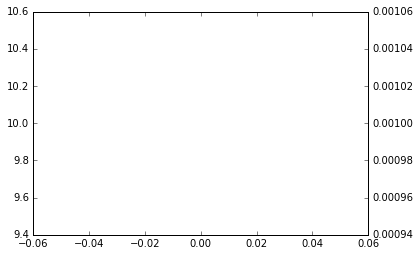

In [40]:
fexperience, steps_per_episode, alpha_per_episode \
    = driver.train(env, linfa, fexperience, n_episodes=1, max_steps=300, is_render=False)
# Credits: http://matplotlib.org/examples/api/two_scales.html
fig, ax1 = pyplot.subplots()
ax1.plot(steps_per_episode, color='b')
ax2 = ax1.twinx()
ax2.plot(alpha_per_episode, color='r')
pyplot.show()

In [127]:
%matplotlib pyplot
pyplot.plot(fexperience.theta)
pyplot.show()

KeyError: u'pyplot'

In [7]:
steps_per_episode = driver.exec_greedy(env, fexperience, n_episodes=100, max_steps=200, is_render=True)

ArgumentError: argument 2: <type 'exceptions.TypeError'>: wrong type

In [90]:
four_n_weights, four_feature_vec \
    = fourier_fa.make_feature_vec(state_ranges,
                                  n_acts=2,
                                  order=5)

#fv = feature_vec(cartpole.observation_space.sample(), cartpole.action_space.sample())
import functools
from hiora_cartpole import linfa
init_with_lambda = functools.partial(linfa.init,
                        init_alpha=0.001,
                        epsi=0.05,
                        feature_vec=four_feature_vec,
                        n_weights=four_n_weights,
                        act_space=env.action_space,
                        theta=None,
                        is_use_alpha_bounds=False)
lambda_experiences = [init_with_lambda(0.1 * l) for l in range(11)]

In [95]:
exps_steps_alphas = [driver.train(env, linfa, exp, n_episodes=200, max_steps=300)
                        for exp in lambda_experiences]

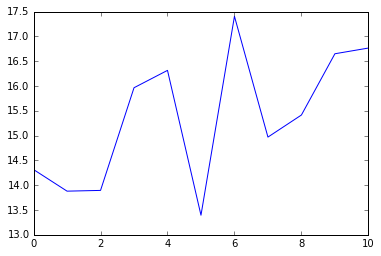

In [96]:
fig, ax1 = pyplot.subplots()
ax1.plot([np.average(esa[1]) for esa in exps_steps_alphas], color='b')
pyplot.show()

Results are quite variable, but lambdas around 0.5 looked good on several trials.